Simple Denoising Convolutional Autoencoder on Fashion MNIST 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


Build the Autoencoder

In [3]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Bottleneck

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Early Stopping Callback

In [4]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - loss: 0.4108 - val_loss: 0.3141
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - loss: 0.3107 - val_loss: 0.3086
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - loss: 0.3059 - val_loss: 0.3053
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - loss: 0.3031 - val_loss: 0.3034
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - loss: 0.3015 - val_loss: 0.3019
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - loss: 0.3002 - val_loss: 0.3008
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - loss: 0.2996 - val_loss: 0.3001
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - loss: 0.2981 - val_loss: 0.2993
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - loss: 0.2975 - val_loss: 0.2988
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - loss: 0.2975 - val_loss: 0.2983
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - loss: 0.2962 - val_loss: 0.2979
Epoch 12/20
375/375 ━━━━━━━━━━

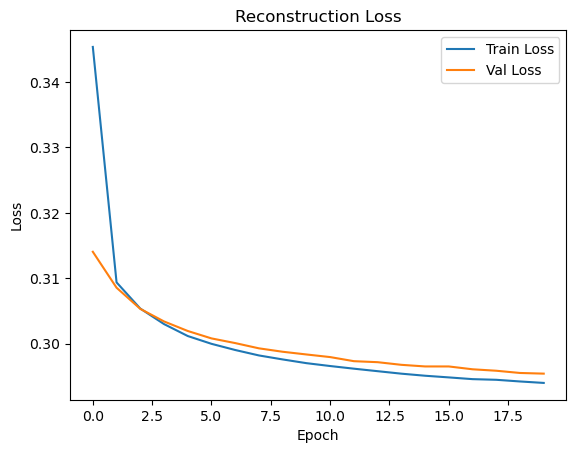

In [5]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Reconstruction Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Visualize Reconstruction

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


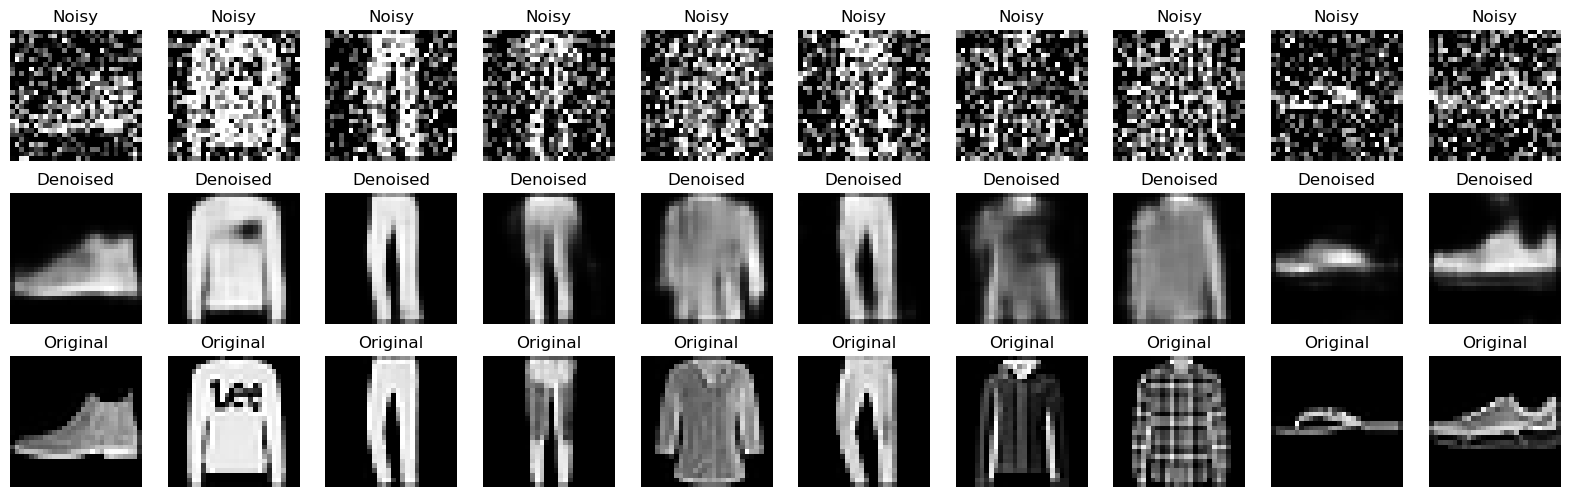

In [6]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

    # Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")
plt.show()


Visualize Bottleneck Feature Map

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


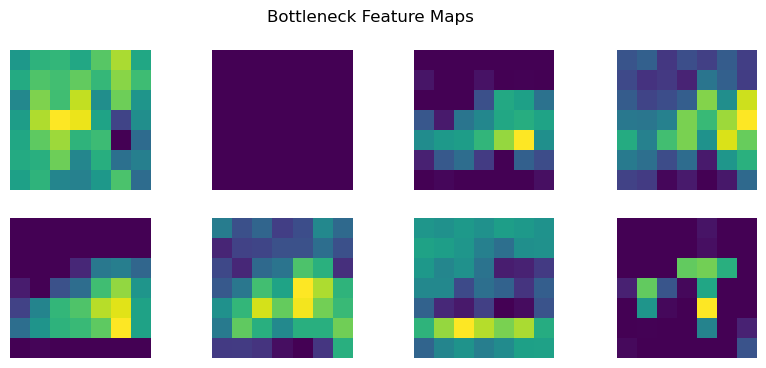

In [7]:
encoder = Model(input_img, encoded)
bottleneck_features = encoder.predict(x_test_noisy[:1])  # One image

# Plot bottleneck representation
plt.figure(figsize=(10, 4))
for i in range(8):  # Display 8 channels
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(bottleneck_features[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Bottleneck Feature Maps")
plt.show()


To build a convolutional autoencoder using TensorFlow to:

 -Compress and reconstruct Fashion MNIST images

 -Denoise noisy input images

 -Visualize original, noisy, and reconstructed images

 -Plot reconstruction loss graph

 -Display bottleneck feature maps

 -Apply early stopping during training



Model Summary:
Encoder:
 -Conv2D → ReLU → MaxPooling
 
 -Conv2D → ReLU → MaxPooling (output shape: 7×7×16)

Decoder:
 -Conv2D → ReLU → UpSampling

 -Conv2D → ReLU → UpSampling

 -Conv2D (sigmoid) to reconstruct grayscale images

Training Details:
 -Optimizer: Adam

 -Loss: Binary Crossentropy

 -Epochs: Up to 20

 -Batch Size: 128

 -EarlyStopping: Patience = 3, monitor = val_loss

Results:
Loss Graph:
Training and validation loss decreased smoothly, early stopping prevented overfitting.

Reconstruction Visualization:
 -Top: Noisy images

 -Middle: Reconstructed outputs

 -Bottom: Original images Model effectively removed noise and retained object structure.

Bottleneck Visualization:
8 feature maps (out of 16) from the encoder layer showed feature activations, indicating learned visual patterns.

The model successfully denoised Fashion MNIST images using a convolutional autoencoder. Visuals and similarity score confirm effective learning. Training was stable with early stopping.